In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,f1_score
import joblib

In [44]:
import pandas as pd
# ganti ID file dengan ID dari google drive Anda
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'

# buat unduhan langsung dari google drive
download_url = f'https://drive.google.com/uc?id={file_id}'

# muat dataset
data = pd.read_csv(download_url)

# tampilin 5 baris pertama dataset
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [45]:
# tampilin info dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [46]:
print('Missing values in each column:')
print(data.isnull().sum())

Missing values in each column:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [47]:
# hapus kolom yang tidak diperlukan
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# cek kembali
print(data.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


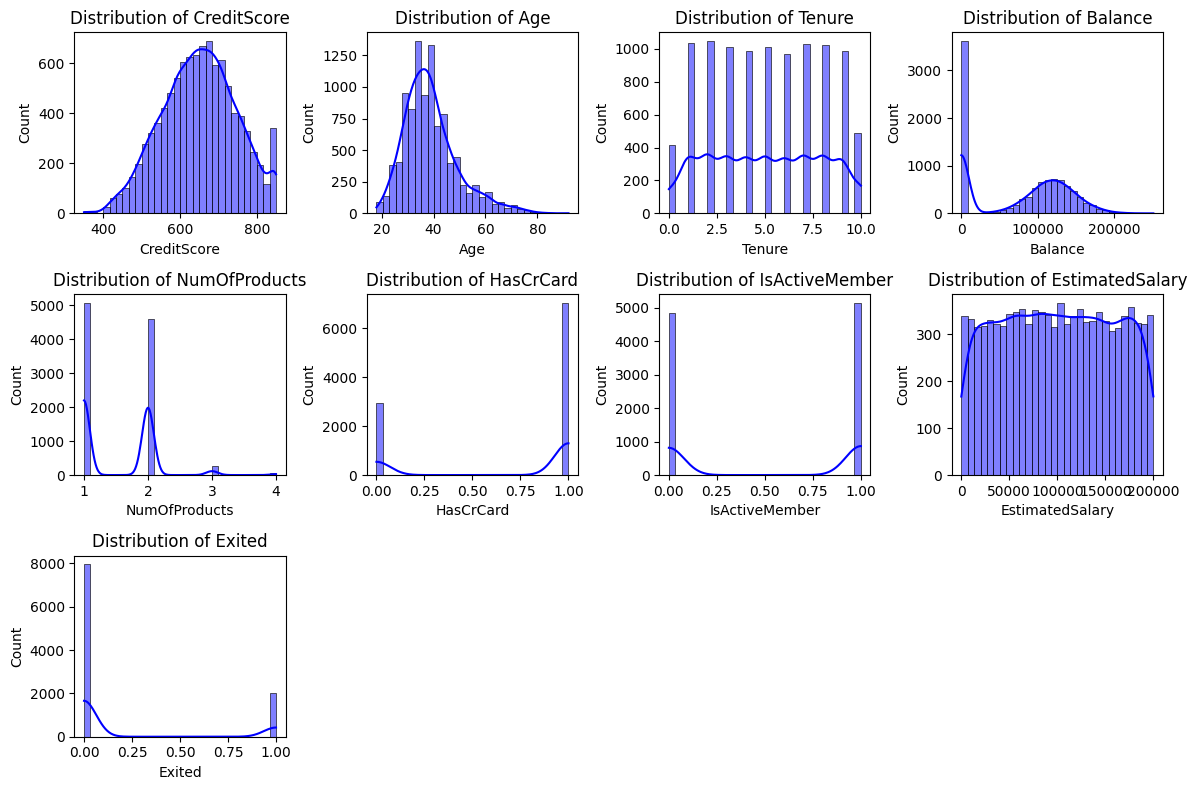

In [48]:
# Distribusi fitur numerik

num_features =  data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(num_features[column], kde=True,bins=30,color='blue')
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

C:\Users\andrian indyanto\AppData\Local\Temp\ipykernel_14660\2596566879.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
C:\Users\andrian indyanto\AppData\Local\Temp\ipykernel_14660\2596566879.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')


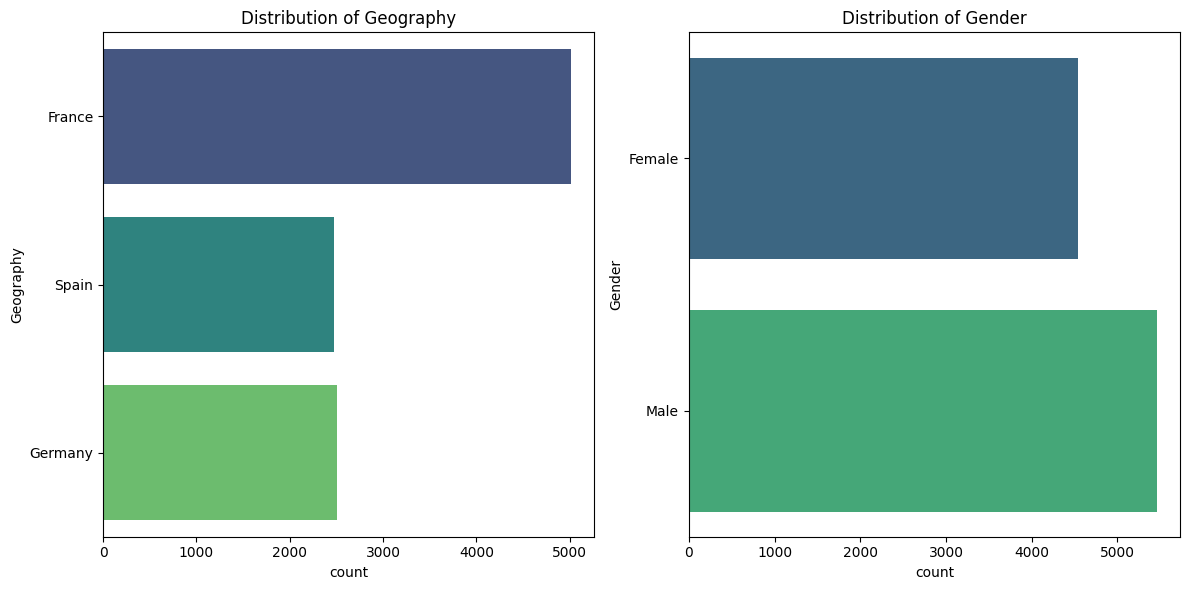

In [49]:
# distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(12, 6))

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

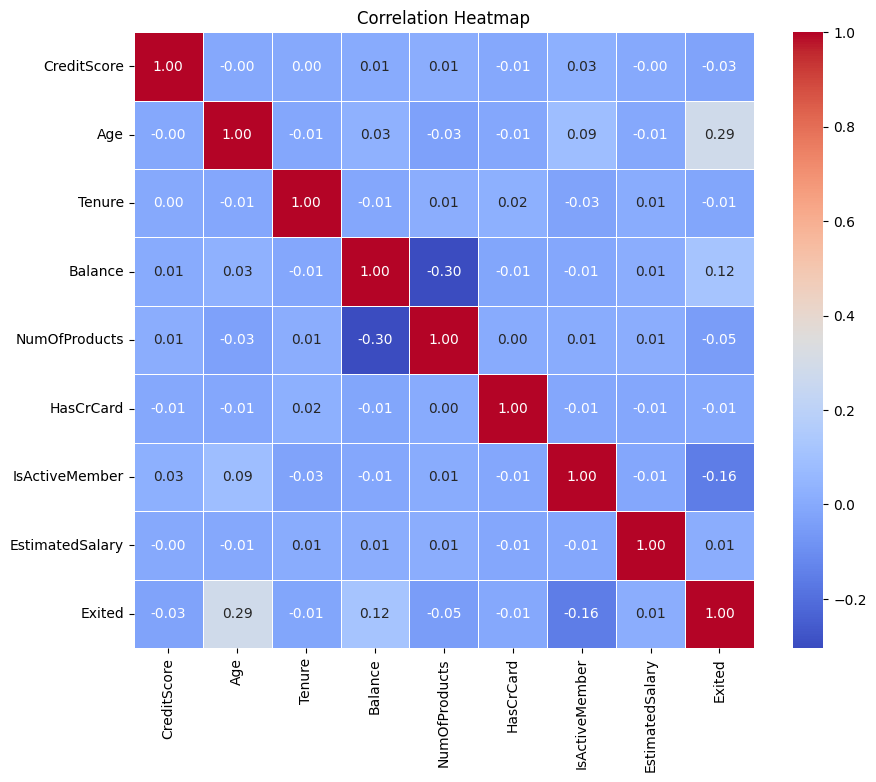

In [50]:
# heatmap korelasi
plt.figure(figsize=(10, 8))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

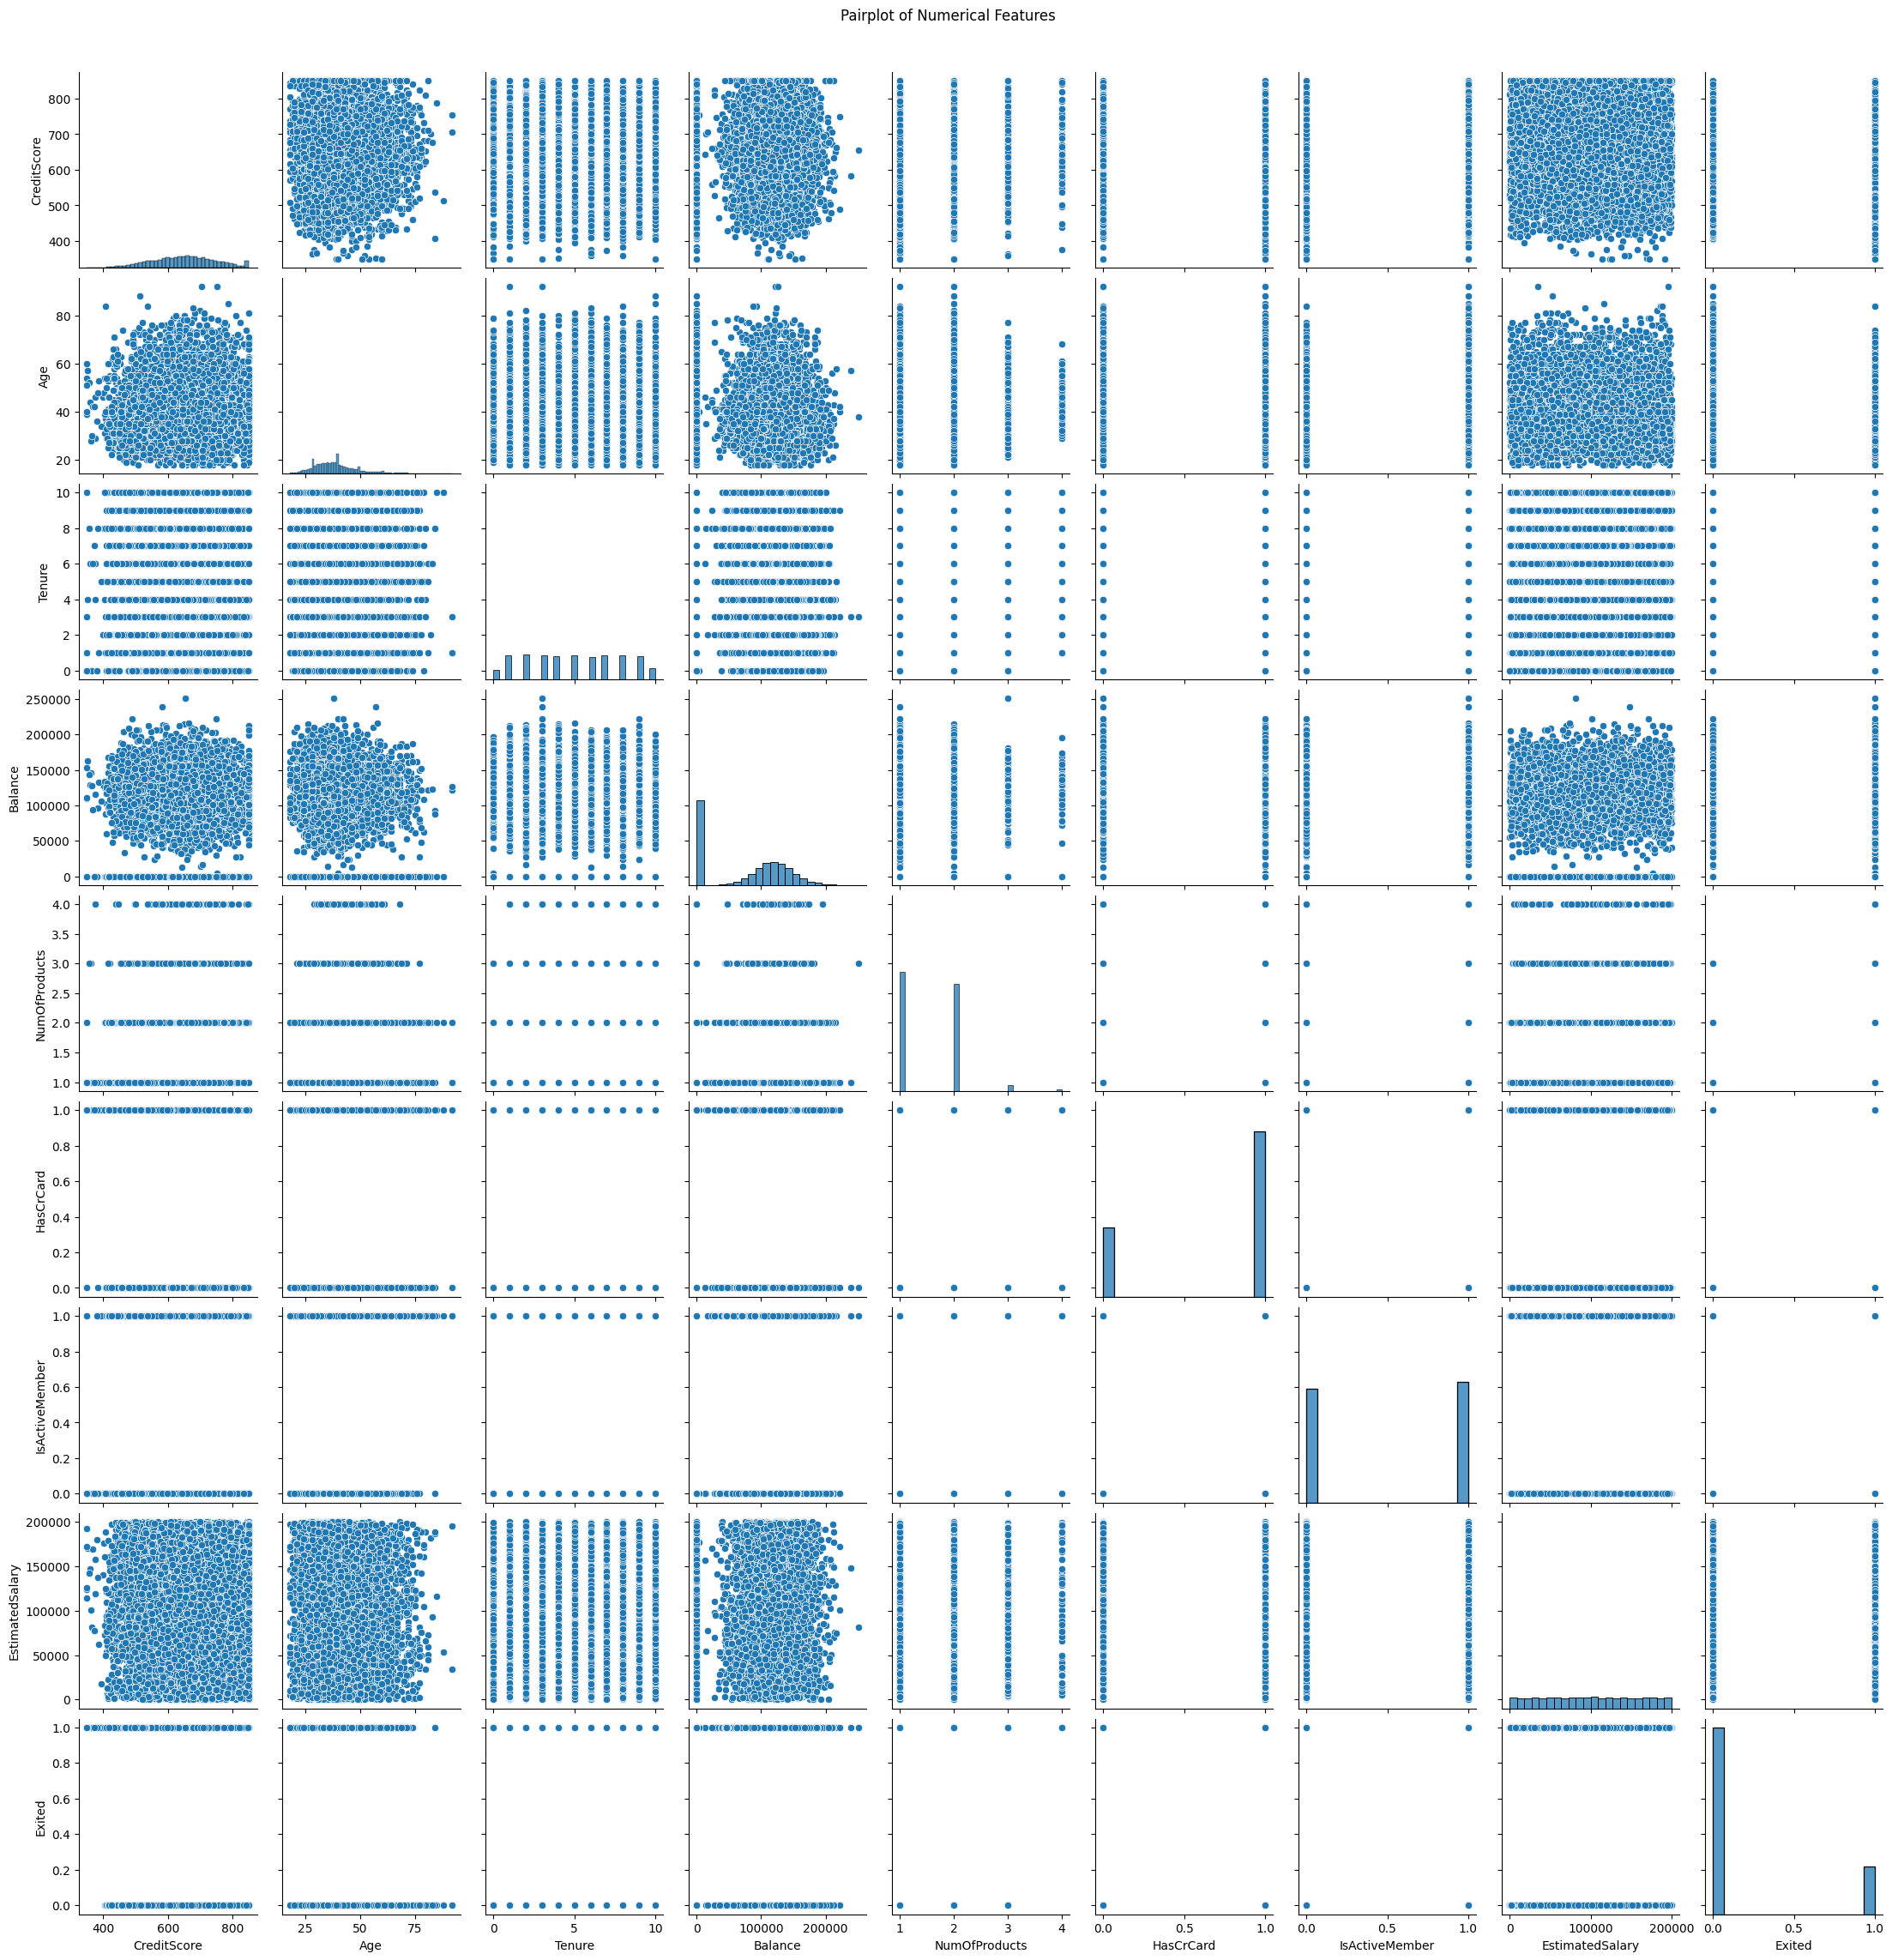

In [51]:
#scatter plot
sns.pairplot(num_features)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

C:\Users\andrian indyanto\AppData\Local\Temp\ipykernel_14660\1429445570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='viridis')


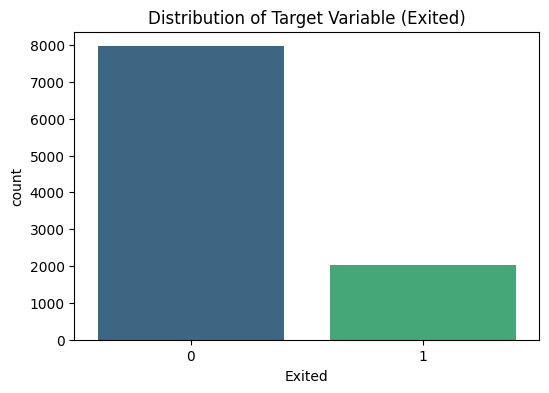

In [52]:
# visualisai seimbang atau tidak seimbangnya kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Exited)')
plt.show()

In [53]:
# label encoding untuk fitur kategorikal
label_encoder = LabelEncoder()

# geography and gender
cat_features = ['Geography','Gender']

for column in cat_features:
    data[column] = label_encoder.fit_transform(data[column])

# cek kembali
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# scaler
scaler  = MinMaxScaler()

# pisah fitur dan target
X = data.drop('Exited', axis=1) 
y = data['Exited']  

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalisasi
num_columns = X_train.select_dtypes(include=[np.number]).columns
# Di Training set pake fit_transform
X_train[num_columns] = scaler.fit_transform(X_train[num_columns]) 
# Di Test set CUMA pake transform (JANGAN di-fit ulang)
X_test[num_columns] = scaler.transform(X_test[num_columns])

#visualisasi data setelah split
print(f'Training shape: {X_train.shape},{y_train.shape}')
print(f'Test shape: {X_test.shape},y_test= {y_test.shape}')

Training shape: (8000, 10),(8000,)
Test shape: (2000, 10),y_test= (2000,)


In [55]:
# bagian pelatihan model
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier(class_weight='balanced').fit(X_train, y_train)
rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
svm = SVC(class_weight='balanced').fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


In [56]:
# fungsi untuk evaluasi model dan mengembalikan hasil evaluasi

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Negatives': tn,
        'False Positives': fp,
        'False Negatives': fn,
        'True Positives': tp,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }
    return results

In [57]:
# mengevaluasi semua model dan menyimpan hasilnya
results = {
    'K-NN': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine': evaluate_model(svm, X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test)
}

# buat dataframe untuk menampilkan hasil evaluasi
evaluation_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
rows = []
for model_name, metrics in results.items():
        rows.append({
            'Model': model_name,
            'Accuracy': metrics['Accuracy'],
            'Precision': metrics['Precision'],
            'Recall': metrics['Recall'],
            'F1 Score': metrics['F1 Score']
        })

# konversi ke dataframe
evaluation_df = pd.DataFrame(rows)
#print hasil evaluasi
print(evaluation_df)
        


                    Model  Accuracy  Precision    Recall  F1 Score
0                    K-NN    0.8240   0.595349  0.325700  0.421053
1           Decision Tree    0.7970   0.483544  0.486005  0.484772
2           Random Forest    0.8660   0.777778  0.445293  0.566343
3  Support Vector Machine    0.7780   0.459588  0.737913  0.566406
4             Naive Bayes    0.8285   0.681159  0.239186  0.354049


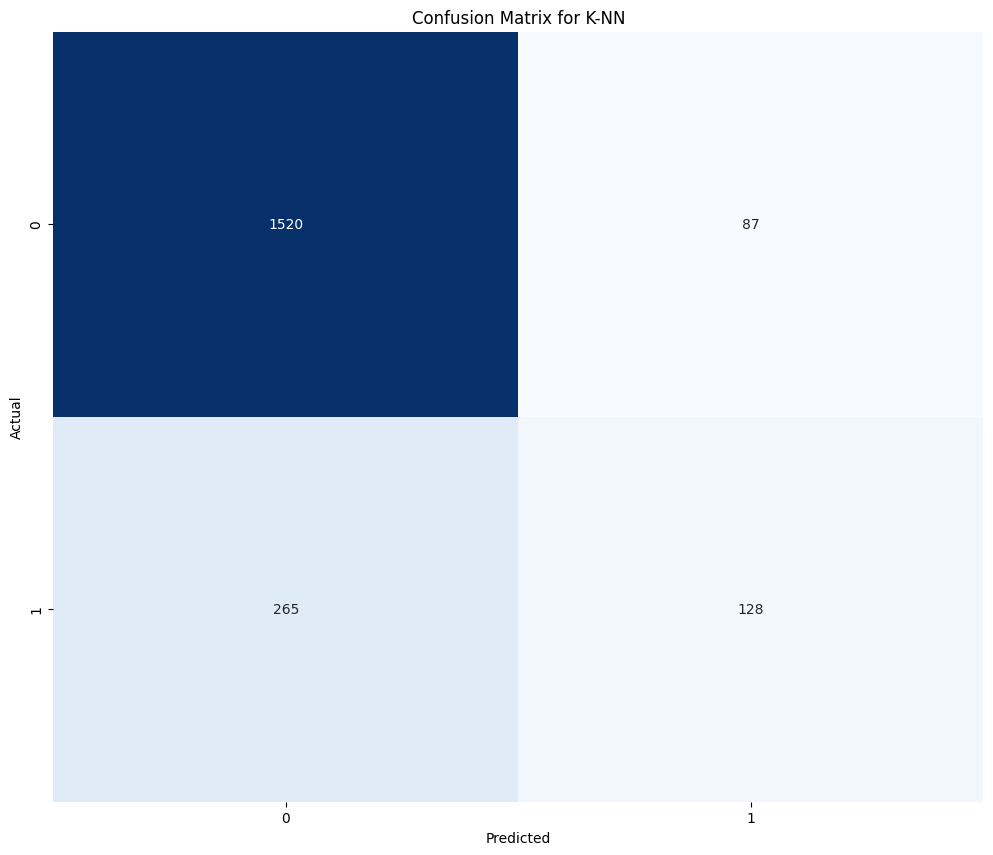

In [58]:
# visualisasi confusion matrix untuk setiap model
cm = evaluate_model(knn, X_test, y_test)['Confusion Matrix']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix for K-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

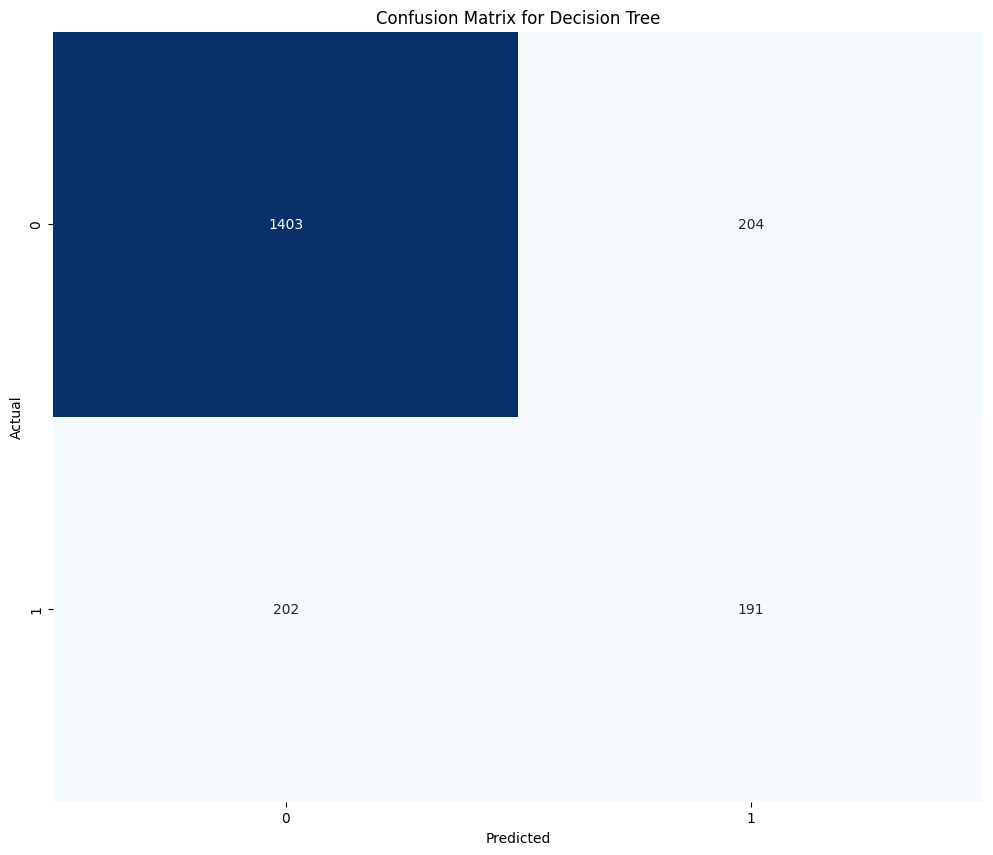

In [59]:
# visualisasi confusion matrix untuk setiap model
cm = evaluate_model(dt, X_test, y_test)['Confusion Matrix']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

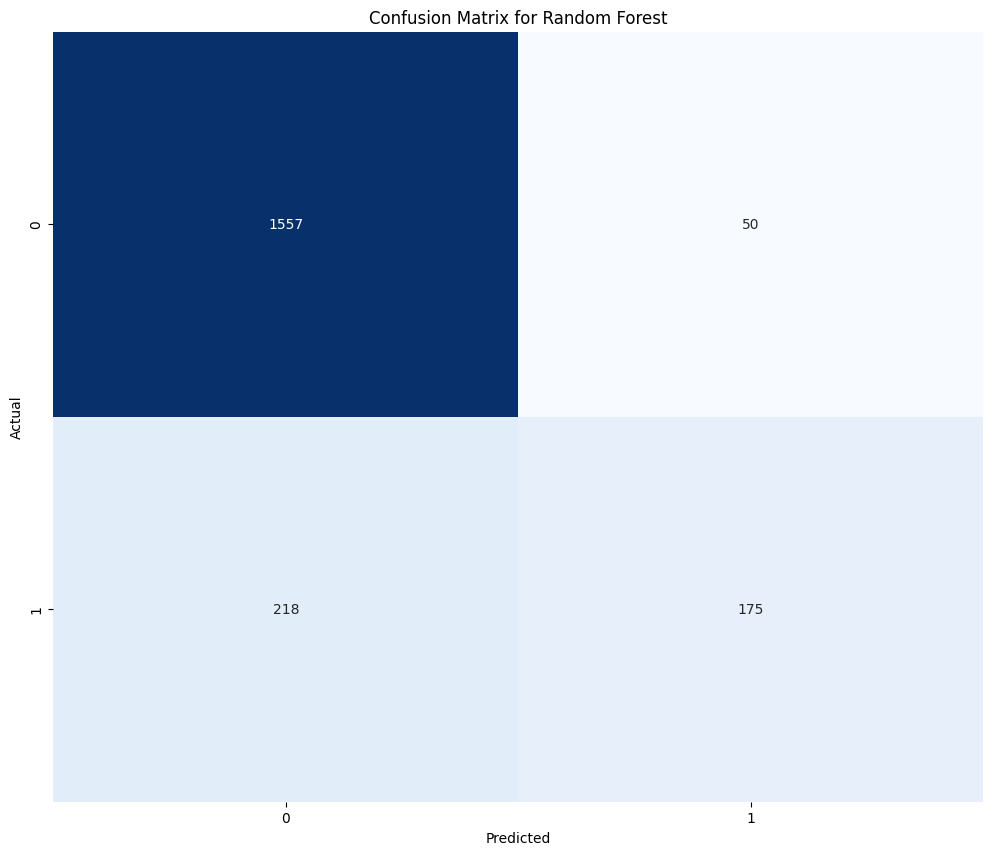

In [60]:
cm = evaluate_model(rf, X_test, y_test)['Confusion Matrix']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

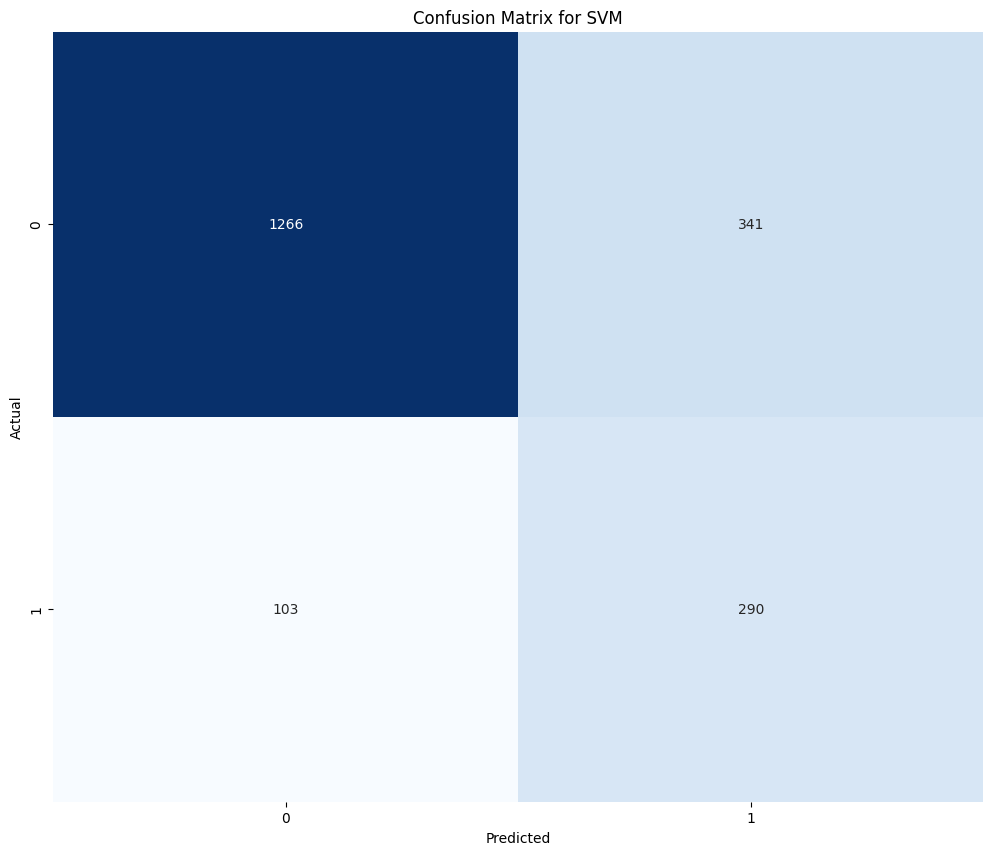

In [61]:
cm = evaluate_model(svm, X_test, y_test)['Confusion Matrix']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

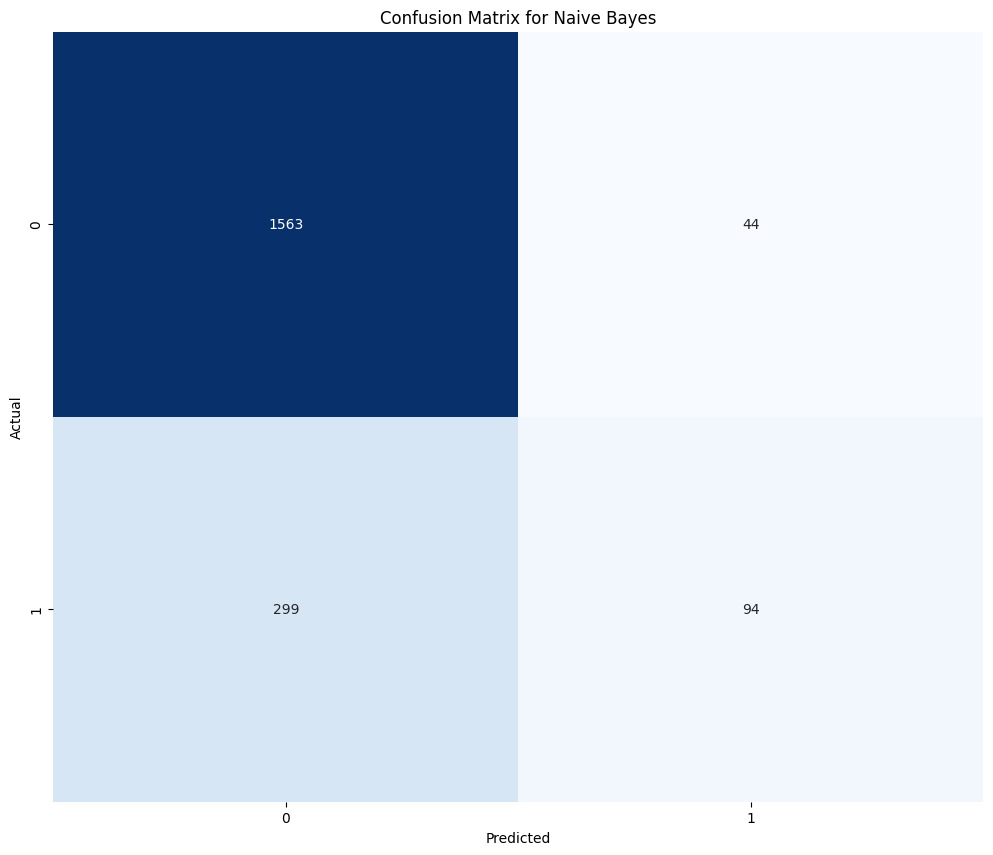

In [62]:
cm = evaluate_model(nb, X_test, y_test)['Confusion Matrix']

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
joblib.dump(svm, 'SVM_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib_model = joblib.load('SVM_model.joblib')



In [64]:

import json

# --- (Bagian ini sama seperti kode generate data sebelumnya) ---
np.random.seed(42)
n_data = 70
data_baru = {
    'RowNumber': range(10001, 10001 + n_data),
    'CustomerId': np.random.randint(15600000, 15800000, n_data).tolist(), # tolist() agar kompatibel JSON
    'Surname': [f'Nasabah_Baru_{i}' for i in range(n_data)],
    'CreditScore': np.random.randint(350, 850, n_data).tolist(),
    'Geography': np.random.choice(['France', 'Spain', 'Germany'], n_data).tolist(),
    'Gender': np.random.choice(['Male', 'Female'], n_data).tolist(),
    'Age': np.random.randint(18, 92, n_data).tolist(),
    'Tenure': np.random.randint(0, 11, n_data).tolist(),
    'Balance': np.random.uniform(0, 250000, n_data).round(2).tolist(),
    'NumOfProducts': np.random.choice([1, 2, 3, 4], n_data, p=[0.5, 0.4, 0.05, 0.05]).tolist(),
    'HasCrCard': np.random.choice([0, 1], n_data).tolist(),
    'IsActiveMember': np.random.choice([0, 1], n_data).tolist(),
    'EstimatedSalary': np.random.uniform(10000, 200000, n_data).round(2).tolist()
}
df_new = pd.DataFrame(data_baru)
# ----------------------------------------------------------------

# Simpan ke file JSON
# orient='records' membuat formatnya jadi List of Objects (standard API)
df_new.to_json('data_nasabah_baru.json', orient='records', indent=4)

print("File 'data_nasabah_baru.json' berhasil dibuat!")

File 'data_nasabah_baru.json' berhasil dibuat!
